# Mark 11

In [1]:
import skimage.io
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read Images

In [2]:
all_imgs = {
    'hrf': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg'),
    'dgs': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_drishti.png'),
    'rm': cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_rm.png')
}

In [3]:
def all_to_rgb(imgs):
    rgbs = {}
    for img in imgs:
        rgbs[img] = cv2.cvtColor(imgs[img], cv2.COLOR_BGR2RGB)
    return rgbs

In [4]:
def resize_to(imgs, scale):
    resized_imgs = {}
    for img in imgs:
        dim = (int(imgs[img].shape[1]*scale/100), int(imgs[img].shape[0]*scale/100))
        resized_imgs[img] = cv2.resize(imgs[img], dim, interpolation=cv2.INTER_AREA)
    return resized_imgs
        

# Convert to RGB

In [5]:
rgb_imgs = all_to_rgb(all_imgs)

# Resize

In [6]:
rsz = resize_to(rgb_imgs, 30)

In [7]:
def display_all(imgs, use_gray=False):
    fig, axs = plt.subplots(1, len(imgs),figsize=(18, 10))
    for i, img in enumerate(imgs):
        axs[i].imshow(imgs[img])
        axs[i].set_title(img)

In [8]:
def display_all_with(imgs:dict, cc:int=0, use_gray:bool=True)->None:
    '''
    Displaying all images with specific color channel
    
    :params imgs: citra
    :params cc: color channel
    :params use_gray: tampilkan dengan grayscale
    
    :return:
    None
    '''
    fig, axs = plt.subplots(1, len(imgs), figsize=(18,10))
    for i, img in enumerate(imgs):
        if use_gray:
            axs[i].imshow(imgs[img][:,:,cc], cmap='gray')
        else:
            axs[i].imshow(imgs[img])
        axs[i].set_title(img)

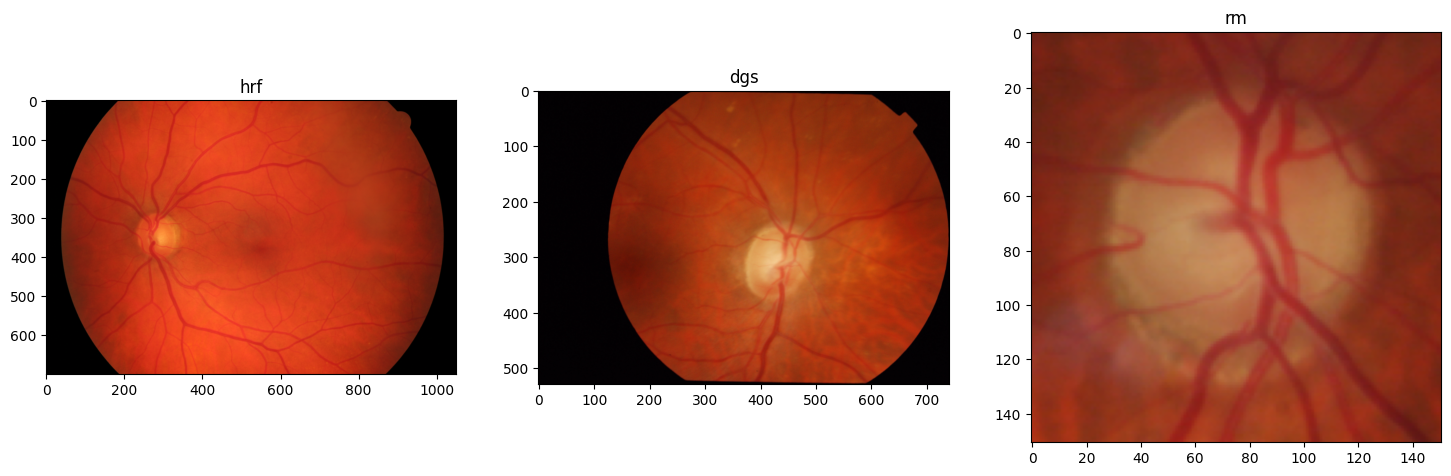

In [9]:
display_all(rsz)

# ROI

In [10]:
def extract_roi(imgs:dict, wlim:int=80) -> dict:
    '''
    Ekstrak ROI
    
    :params imgs: citra
    :params wlim: limit width ROI
    
    :returns:
    ROI dict
    '''
    rois = {}
    for img in imgs:
        if imgs[img].shape[0] < 160:
            rois[img] = imgs[img]
        else:
            gray_c = imgs[img].copy()
            gray_c = cv2.cvtColor(gray_c, cv2.COLOR_RGB2GRAY)
            xmax = cv2.minMaxLoc(gray_c)[3][0]
            ymax = cv2.minMaxLoc(gray_c)[3][1]
            print(xmax, ymax)
            rois[img] = imgs[img][ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]
    return rois

In [11]:
roi = extract_roi(rsz)

293 353
428 306


# Preprocess

In [12]:
def preprocess(imgs, medsize=37):
    preprocessed = {}
    for img in imgs:
        imgs[img][:,:,0] = cv2.medianBlur(imgs[img][:,:,0], medsize)
        preprocessed[img] = imgs[img]
    return preprocessed

In [19]:
roic = roi.copy()

AttributeError: 'str' object has no attribute 'copy'

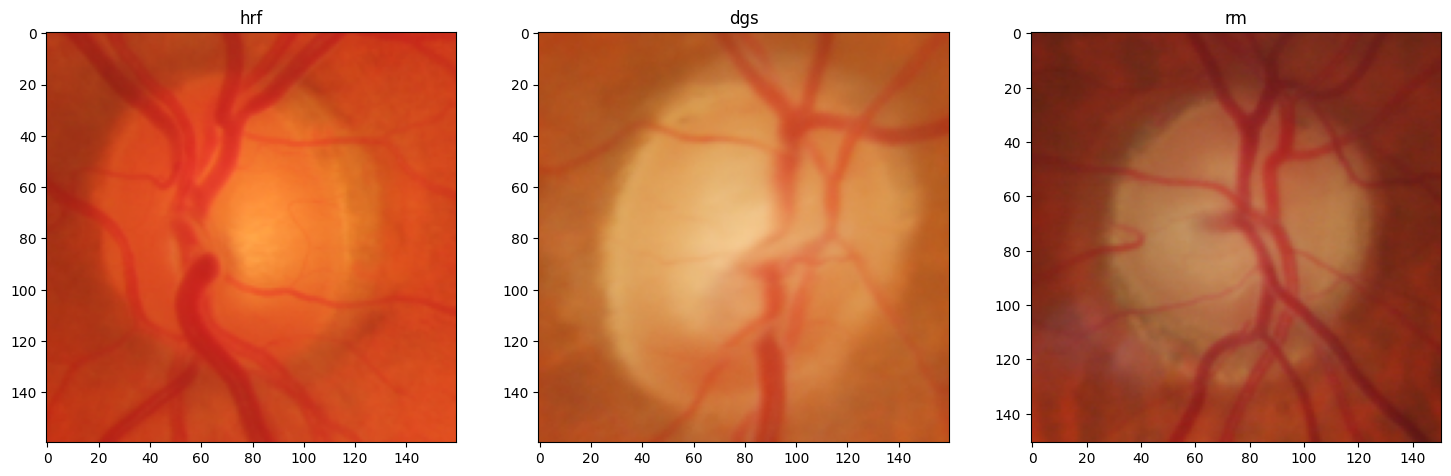

In [14]:
display_all(roic)

In [20]:
hsvroi = {}
for roi in roic:
    hsvroi[roi] = cv2.cvtColor(roic[roi], cv2.COLOR_RGB2HSV)

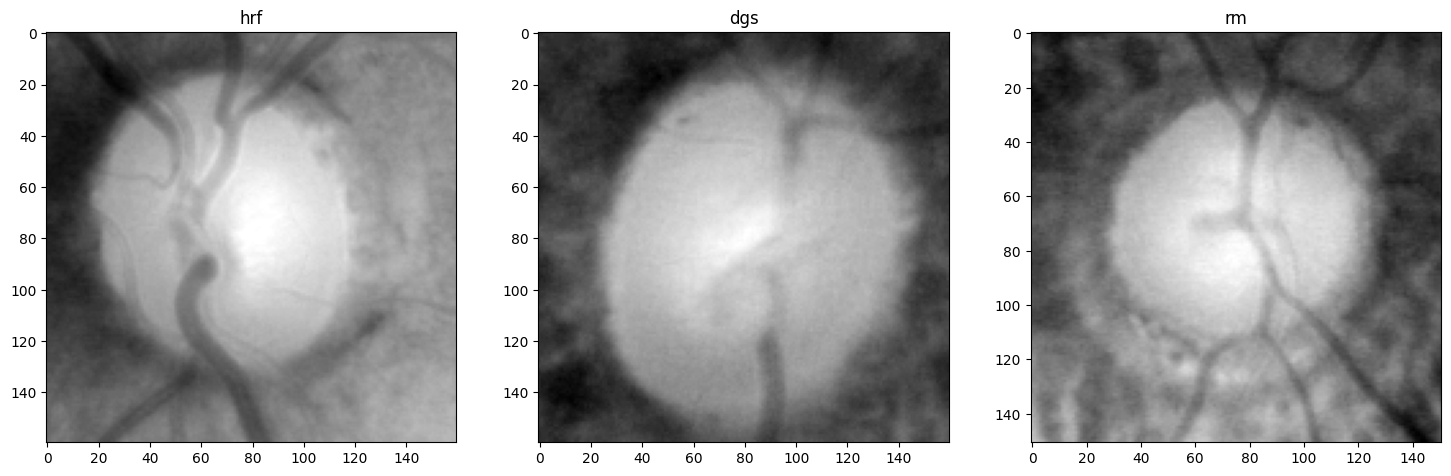

In [21]:
display_all_with(hsvroi, 2)

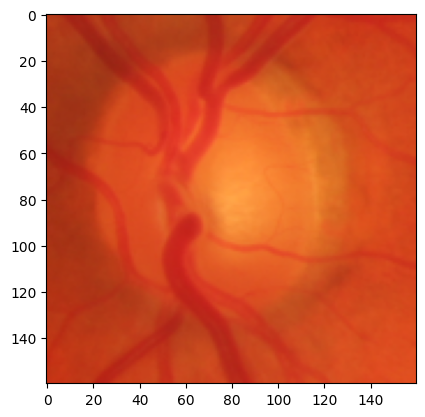

In [24]:
plt.imshow(roic['hrf'])

In [25]:
cv2.circle(roic['hrf'],(73,70),54,(0,255,0),2)

array([[[180,  59,  25],
        [177,  55,  24],
        [177,  53,  23],
        ...,
        [202,  49,  26],
        [203,  51,  27],
        [203,  51,  27]],

       [[180,  61,  26],
        [177,  58,  24],
        [178,  58,  24],
        ...,
        [201,  46,  26],
        [202,  47,  26],
        [202,  47,  26]],

       [[181,  62,  27],
        [179,  60,  25],
        [180,  59,  25],
        ...,
        [201,  46,  27],
        [202,  46,  27],
        [201,  46,  27]],

       ...,

       [[192,  49,  20],
        [195,  51,  22],
        [198,  52,  20],
        ...,
        [226,  80,  33],
        [225,  79,  32],
        [226,  79,  34]],

       [[194,  50,  23],
        [196,  51,  22],
        [199,  52,  23],
        ...,
        [225,  78,  32],
        [225,  79,  32],
        [225,  79,  33]],

       [[195,  52,  22],
        [197,  52,  23],
        [199,  51,  23],
        ...,
        [225,  79,  31],
        [224,  78,  31],
        [225,  76,  33]]

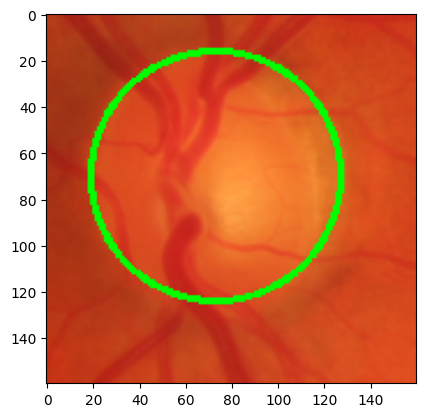

In [26]:
plt.imshow(roic['hrf'])

In [40]:
hrf = cv2.medianBlur(hsvroi['hrf'][:,:,2],5)
circles = cv2.HoughCircles(hrf,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles

In [41]:
circles[0][0][1]

TypeError: 'NoneType' object is not subscriptable

In [30]:
circles.shape

(1, 1, 3)

1. elipse fitting
2. cek B channel
